## Knock airport Weather

Analysis of data from Knock airport weather station. Plotting temperature trends over time. And then plotting the wind speed trends.

Author: Carmine Giardino

In [89]:
import pandas as pd
# Read the data from the API endpoint
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv"
# Read the csv data into a DataFrame
df = pd.read_csv(url, skiprows=23, low_memory=False)
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


## Plot the temperature trends over time

In [90]:
# Convert the 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y %H:%M')
df.head(3)

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0,0,0,25,81,0.0,35000,32,5
1,1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0,0,0,25,82,0.0,40000,45,5
2,1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0,0,0,80,81,0.0,8000,32,7


In [91]:
# Set the index to the date column
df.set_index('date', inplace=True)
df.head(3)

,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
date,,,,,,,,,,,,,,,,,,,,
1996-04-10 14:00:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,1016.7,0,0,0,0,25,81,0.0,35000,32,5
1996-07-31 08:00:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,1011.4,0,0,0,0,25,82,0.0,40000,45,5
1996-07-31 09:00:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,1011.4,0,0,0,0,80,81,0.0,8000,32,7


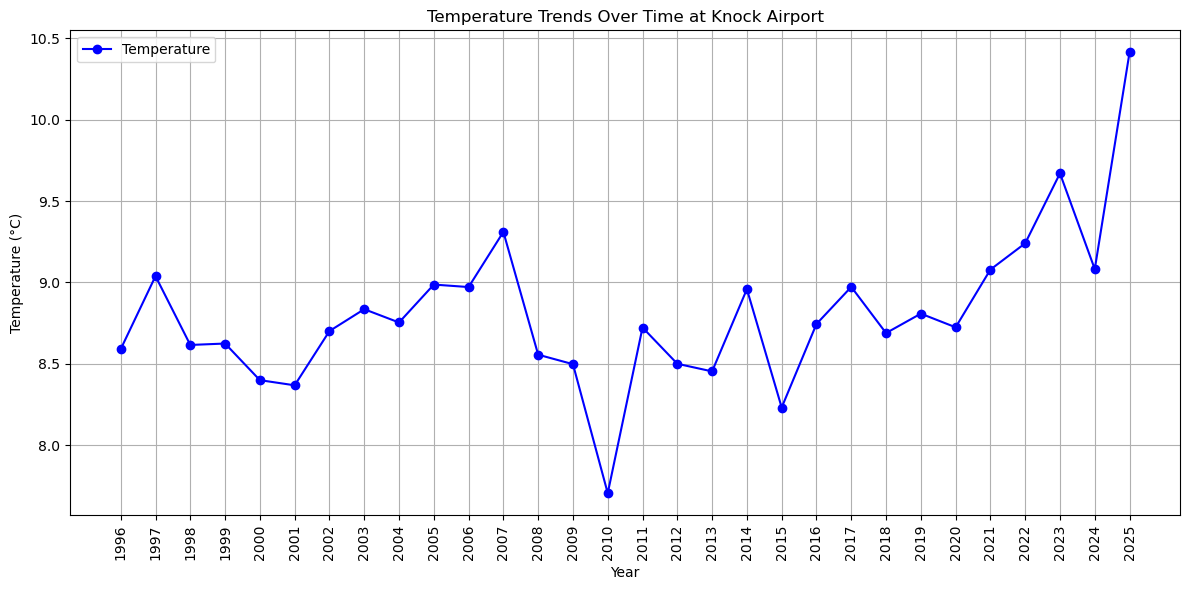

In [92]:
import matplotlib.pyplot as plt
# Group by year and calculate mean temperature
df['year'] = df.index.year
yearly_temp = df.groupby('year')['temp'].mean()

# Plot the temperature trends over time
plt.figure(figsize=(12, 6))
plt.plot(yearly_temp.index, yearly_temp.values, marker='o', color='blue', label='Temperature')
plt.title('Temperature Trends Over Time at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.xticks(yearly_temp.index, rotation=90)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [93]:
import matplotlib.dates as mdates

# Function to set x-axis major ticks to years and format as year
def set_yearly_xticks(ax=None, rotation=90):
    """Set x-axis major ticks to years and format as year."""
    if ax is None:
        ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=rotation)
    plt.xlim(df.index.min(), df.index.max())  # Limit x-axis to data range

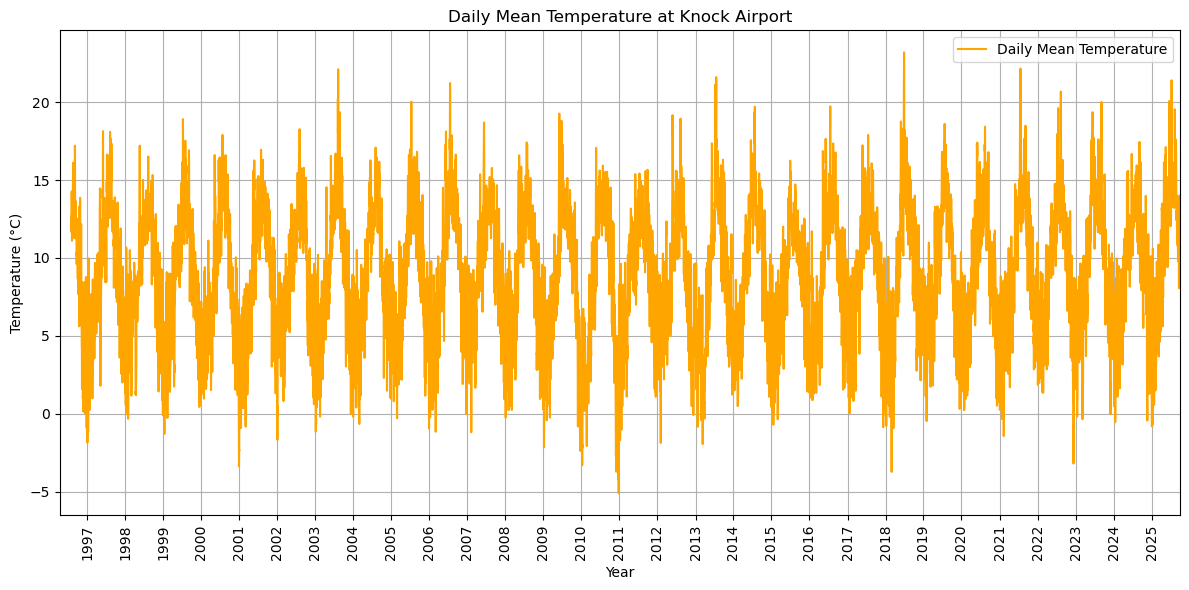

In [94]:
# Group by day and calculate mean temperature
daily_temp = df.resample('D')['temp'].mean()
# Plot the mean temperature for each day
plt.figure(figsize=(12, 6))
plt.plot(daily_temp.index, daily_temp.values, color='orange', label='Daily Mean Temperature')
plt.title('Daily Mean Temperature at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Set major ticks to each year and format as year
set_yearly_xticks(plt.gca())

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

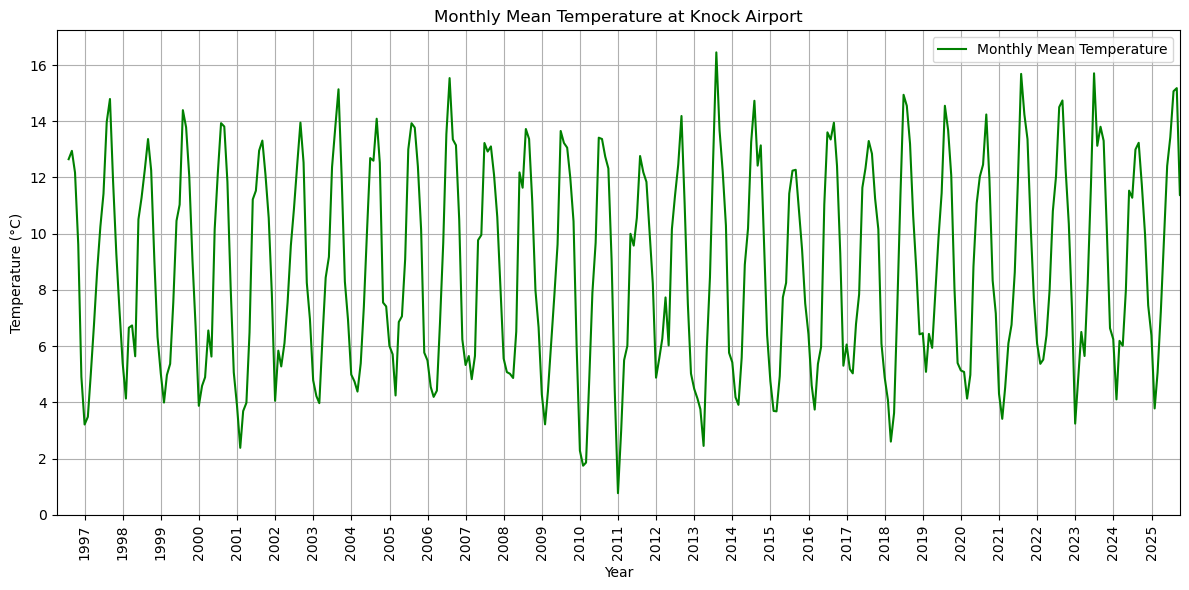

In [95]:
# Group by month and calculate mean temperature
monthly_temp = df.resample('ME')['temp'].mean()

# Plot the mean temperature for each month
plt.figure(figsize=(12, 6))
plt.plot(monthly_temp.index, monthly_temp.values, color='green', label='Monthly Mean Temperature')
plt.title('Monthly Mean Temperature at Knock Airport')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')

# Set major ticks to each year and format as year
set_yearly_xticks(plt.gca())

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()